## Logistic Regression
This is the implementation of Logistic Regression Model by using the required datasets and tuning the specified parameters to achieve a better training performance.

We have here also used the required libraries for preprocessing the data and also showed the importance of how the sigmoid function helps in learning of a better decision boundary by better updating the weights
and we have also shown how the cost is affected by using this sigmiod function and how we give penalty to the weights when they give wrong approximations.

Hence, by using the sigmoid function we have used a better approach as we could use real valued penalties and not only integer penalties

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from Logistic_Regression import LogisticRegressionGD
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Sigmoid Function

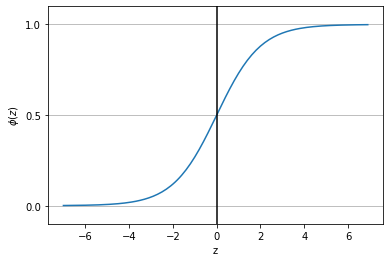

In [35]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

### Cost Penalties

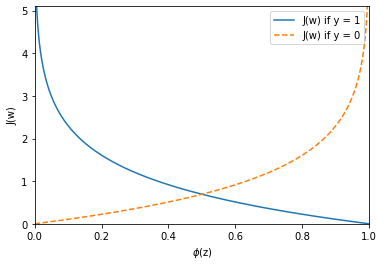

In [36]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z,c0,linestyle = '--',label = 'J(w) if y = 0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc = 'best')
plt.show()

### Decision Boundary Function

In [37]:
def plot_decision_boundary(X,y,classifier,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y = X[y==cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = cl,edgecolors='black')
        

### Preprocessing Data

In [38]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,stratify = y)
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

### Training the Data

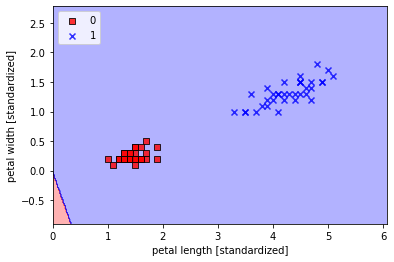

In [39]:
lrgd = LogisticRegressionGD(eta = 0.05,n_iter = 1000,random_state = 1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_boundary(X_train_01_subset,y_train_01_subset,classifier = lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()